In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
system_sizes = [24, 48]
max_bond_dims = [8, 16, 32, 64, 128, 256]
error_rates = np.linspace(0.1, 0.3, 10)

failure_rates = {}
error_bars = {}

for system_size in system_sizes:
    for chi_max in max_bond_dims:
        for error_rate in error_rates:
            failures_key = (
                f"numbits{system_size}_bonddim{chi_max}_errorprob{error_rate}"
            )
            try:
                failures_statistics = np.load(f"../../data-classical-ldpc/{failures_key}.npy")
            except:
                failures_statistics = np.load(f"../../data-cedar/{failures_key}.npy")
            failure_rates[system_size, chi_max, error_rate] = np.mean(
                failures_statistics
            )
            error_bars[system_size, chi_max, error_rate] = (
                np.std(failures_statistics)
                * 1.96 # 95% confidence interval
                / np.sqrt(len(failures_statistics))
            )

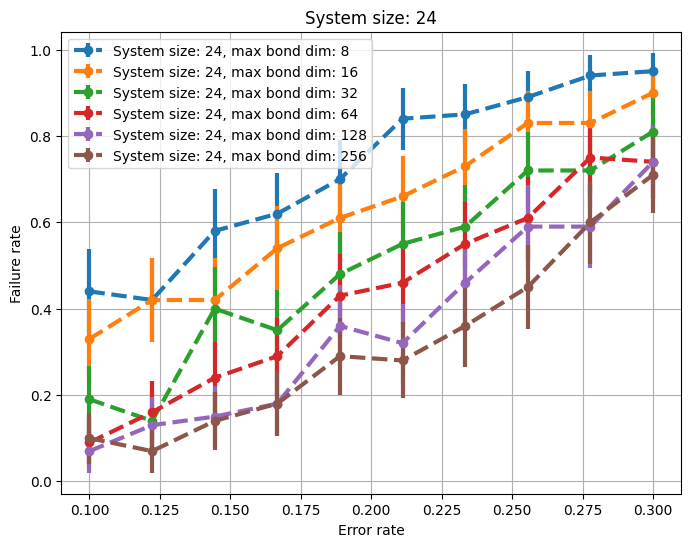

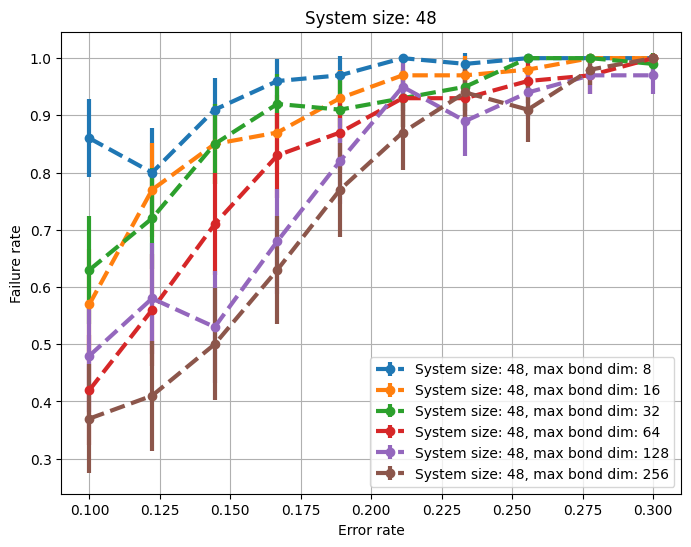

In [27]:
for system_size in system_sizes:
    plt.figure(figsize=(8, 6))
    for chi_max in max_bond_dims:
        plt.errorbar(
            error_rates,
            [
                failure_rates[system_size, chi_max, error_rate]
                for error_rate in error_rates
            ],
            yerr=[
                error_bars[system_size, chi_max, error_rate]
                for error_rate in error_rates
            ],
            fmt="o--",
            label=f"System size: {system_size}, max bond dim: {chi_max}",
            linewidth=3,
        )
    plt.title(f"System size: {system_size}")
    plt.legend()
    plt.xlabel("Error rate")
    plt.ylabel("Failure rate")
    plt.grid()

    plt.show()